In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [293]:
df = pd.read_csv('/content/gavote.csv')

In [294]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  159 non-null    object 
 1   equip       159 non-null    object 
 2   econ        159 non-null    object 
 3   perAA       159 non-null    float64
 4   rural       159 non-null    object 
 5   atlanta     159 non-null    object 
 6   gore        159 non-null    int64  
 7   bush        159 non-null    int64  
 8   other       159 non-null    int64  
 9   votes       159 non-null    int64  
 10  ballots     159 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ KB


(            perAA           gore           bush        other          votes  \
 count  159.000000     159.000000     159.000000   159.000000     159.000000   
 mean     0.242981    7020.314465    8929.056604   381.654088   16331.025157   
 std      0.163082   19317.779818   18029.959822  1150.974980   36623.274439   
 min      0.000000     249.000000     271.000000     5.000000     832.000000   
 25%      0.111500    1385.500000    1803.500000    30.000000    3506.500000   
 50%      0.233000    2326.000000    3597.000000    86.000000    6299.000000   
 75%      0.348000    4430.000000    7468.500000   210.000000   11846.500000   
 max      0.765000  154509.000000  140494.000000  7920.000000  263211.000000   
 
              ballots  
 count     159.000000  
 mean    16926.503145  
 std     37865.152282  
 min       881.000000  
 25%      3693.500000  
 50%      6712.000000  
 75%     12251.000000  
 max    280975.000000  ,
 None)

In [295]:
df.shape

(159, 11)

##Data Vizualization

In [296]:
df.head()

,Unnamed: 0,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
0,APPLING,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
1,ATKINSON,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
2,BACON,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
3,BAKER,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
4,BALDWIN,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


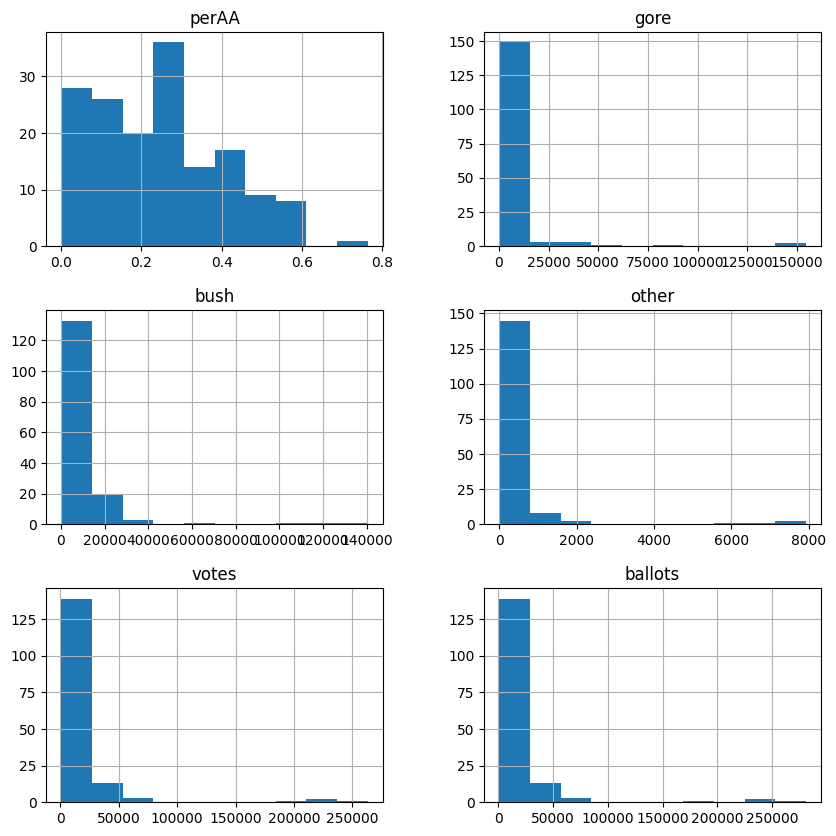

In [297]:
df.hist(figsize=(10,10))
plt.show()

In [298]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [299]:
df.head()

,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
0,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
1,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
2,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
3,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
4,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


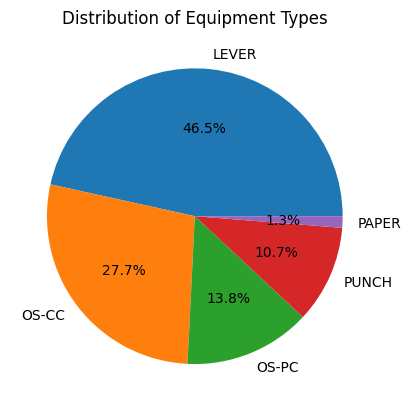

In [300]:
equip_counts = df['equip'].value_counts()
plt.pie(equip_counts, labels=equip_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Equipment Types')
plt.show()

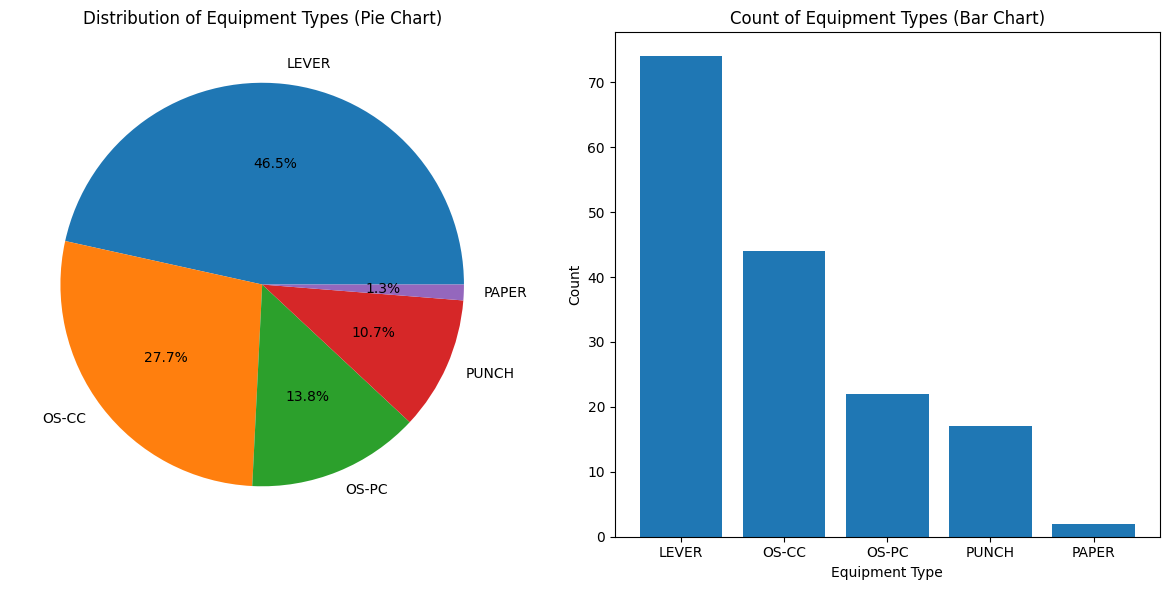

In [301]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Plot 1 ( pie chart)
axes[0].pie(equip_counts, labels=equip_counts.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Equipment Types (Pie Chart)')

# Plot 2 (bar chart)
axes[1].bar(equip_counts.index, equip_counts.values)
axes[1].set_xlabel('Equipment Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Equipment Types (Bar Chart)')

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

In [302]:
under_counts = df['ballots'] - df['votes']

norm_under_counts = under_counts/df['ballots']
norm_under_counts

,0
0,0.078283
1,0.036296
2,0.105169
3,0.054760
4,0.051545
...,...
154,0.023141
155,0.026749
156,0.026596
157,0.013713


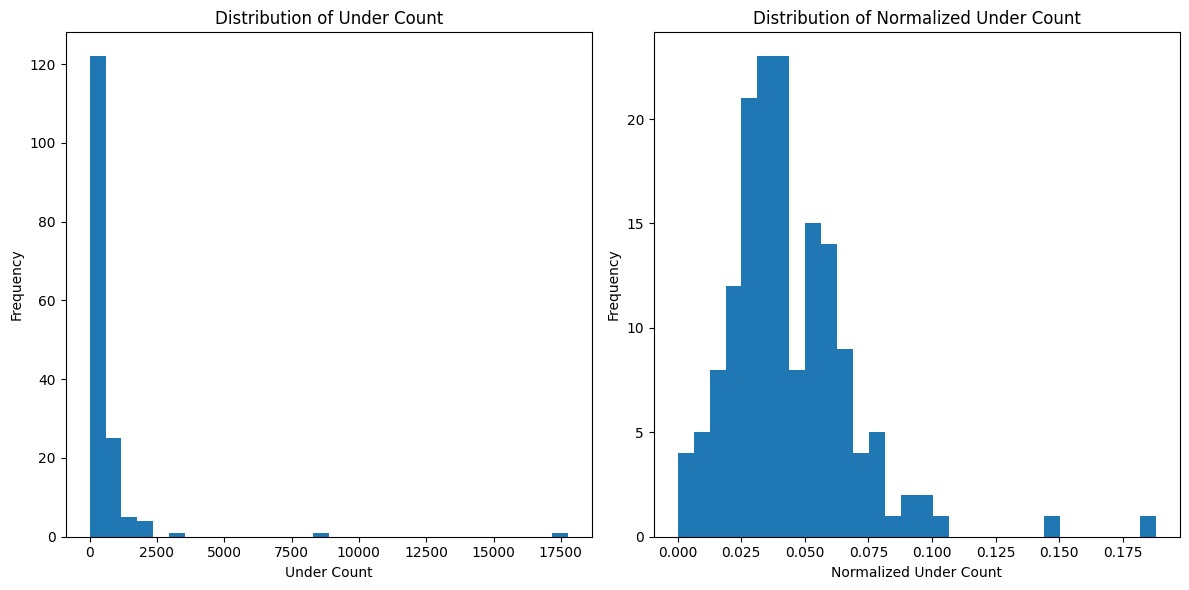

In [303]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Plot 1
axes[0].hist(under_counts.values,bins=30) # Pass the values as data
axes[0].set_xlabel('Under Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Under Count')

# Plot 2
axes[1].hist(norm_under_counts.values,bins=30) # Pass the values as data
axes[1].set_xlabel('Normalized Under Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Normalized Under Count')

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

In [304]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

<Axes: >

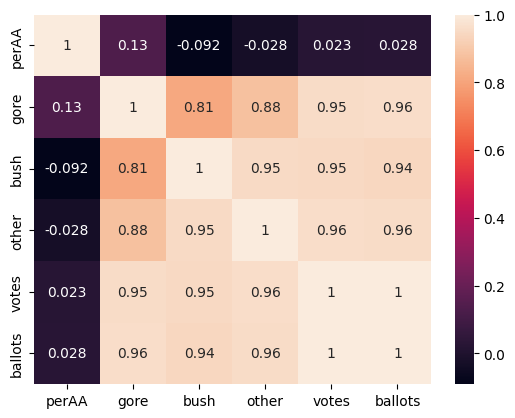

In [305]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

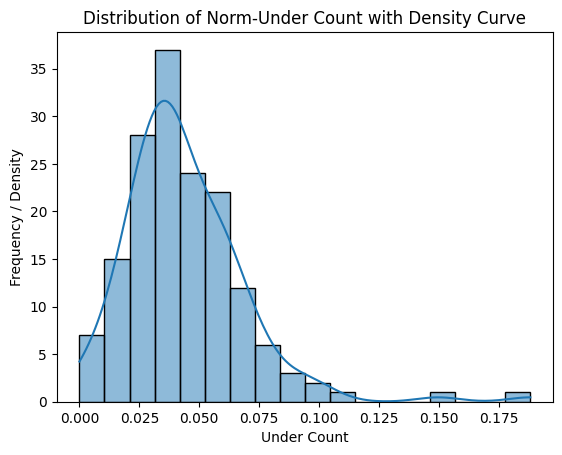

In [306]:
sns.histplot(data=df, x=norm_under_counts, kde=True, bins='auto')
plt.xlabel('Under Count')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Norm-Under Count with Density Curve')
plt.show()

Text(0.5, 1.0, 'Box Plot of Under-counts by Equipment')

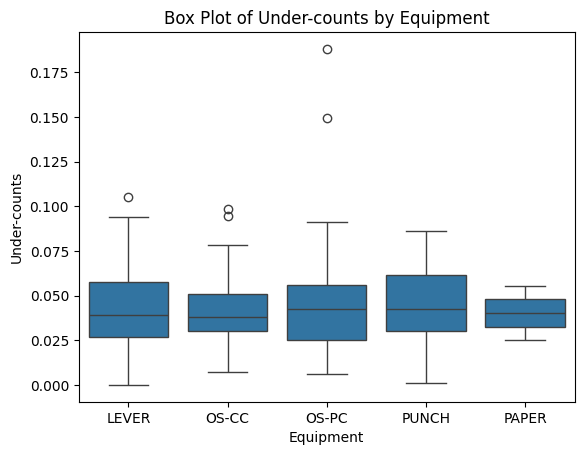

In [307]:
sns.boxplot(data=df, x='equip', y=norm_under_counts.values)
plt.xlabel('Equipment')
plt.ylabel('Under-counts')
plt.title('Box Plot of Under-counts by Equipment')

In [308]:
norm_under_counts.median()

0.03983313147624815

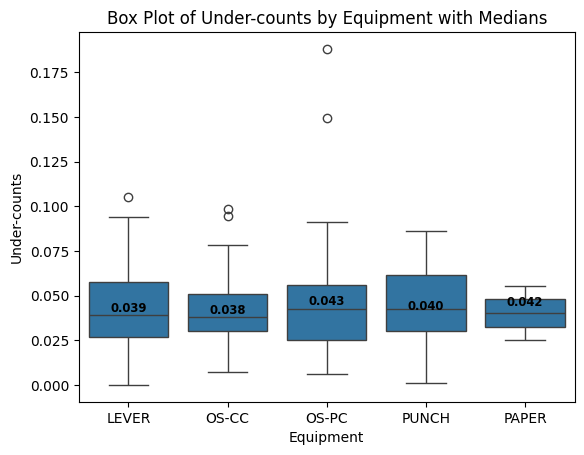

In [309]:
# Add under_counts and norm_under_counts as columns to the DataFrame if they don't exist
if 'under_counts' not in df.columns:
    df['under_counts'] = df['ballots'] - df['votes']
if 'norm_under_counts' not in df.columns:
    df['norm_under_counts'] = norm_under_counts

# Create the boxplot
ax = sns.boxplot(data=df, x='equip', y='norm_under_counts')
plt.xlabel('Equipment')
plt.ylabel('Under-counts')
plt.title('Box Plot of Under-counts by Equipment with Medians')

# Calculate medians for each equipment type
medians = df.groupby('equip')['norm_under_counts'].median()
vertical_offset = df['norm_under_counts'].median() * 0.05 # Adjust as needed for label placement

# Display medians on the plot
for xtick in ax.get_xticks():
    equip_type = medians.index[xtick]
    label = medians.loc[equip_type]
    ax.text(xtick, label + vertical_offset, f'{label:.3f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()

In [310]:
lr =LinearRegression()
df1 = pd.get_dummies(df, columns=['equip','econ','rural','atlanta'])
X=df1.drop(['under_counts'],axis=1)
y=df1['under_counts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr.fit(X_train,y_train)

LinearRegression()

In [317]:
lr.coef_,lr.intercept_

(array([-3.74752627e-12, -2.50000000e-01, -2.50000000e-01, -2.50000000e-01,
        -7.50000000e-01,  1.00000000e+00,  1.02925345e-11,  6.31843632e-13,
        -4.72711465e-13, -4.10786096e-13,  9.04321573e-13, -6.52667511e-13,
        -1.12248368e-13,  4.41659681e-14,  6.80830332e-14,  2.58902493e-14,
        -2.58901409e-14, -3.32490918e-13,  3.32491029e-13]),
 np.float64(4.547473508864641e-12))

In [312]:
lr.predict(X_test)

array([ 243.,   65.,  618.,  317.,  261.,   57.,  655.,  107.,  469.,
        205.,   85.,  246.,  589.,  353., 1907., 1911.,  330.,  296.,
        282.,  296.,   41.,  178.,  344.,   65.,   67.,  407.,    2.,
        995.,  759.,  158.,  719.,   35.])

In [313]:
mean_squared_error(y_test,lr.predict(X_test))

1.9052917512099994e-23

In [314]:
r2_score(y_test,lr.predict(X_test))

1.0

In [315]:
df1.head()

,perAA,gore,bush,other,votes,ballots,under_counts,norm_under_counts,equip_LEVER,equip_OS-CC,equip_OS-PC,equip_PAPER,equip_PUNCH,econ_middle,econ_poor,econ_rich,rural_rural,rural_urban,atlanta_Atlanta,atlanta_notAtlanta
0,0.182,2093,3940,66,6099,6617,518,0.078283,True,False,False,False,False,False,True,False,True,False,False,True
1,0.230,821,1228,22,2071,2149,78,0.036296,True,False,False,False,False,False,True,False,True,False,False,True
2,0.131,956,2010,29,2995,3347,352,0.105169,True,False,False,False,False,False,True,False,True,False,False,True
3,0.476,893,615,11,1519,1607,88,0.054760,False,True,False,False,False,False,True,False,True,False,False,True
4,0.359,5893,6041,192,12126,12785,659,0.051545,True,False,False,False,False,True,False,False,True,False,False,True


In [318]:
# Get the coefficients from the fitted model
coefficients = lr.coef_

# Get the feature names from the training data
feature_names = X_train.columns

# Create a pandas Series to associate feature names with coefficients
feature_importance = pd.Series(abs(coefficients), index=feature_names)

# Sort the feature importance in descending order
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Display the sorted feature importance
print("Feature Importance (Absolute Coefficients):")
display(sorted_feature_importance)

Feature Importance (Absolute Coefficients):


,0
ballots,1.000000e+00
votes,7.500000e-01
other,2.500000e-01
bush,2.500000e-01
gore,2.500000e-01
norm_under_counts,1.029253e-11
perAA,3.747526e-12
equip_PAPER,9.043216e-13
equip_PUNCH,6.526675e-13
equip_LEVER,6.318436e-13


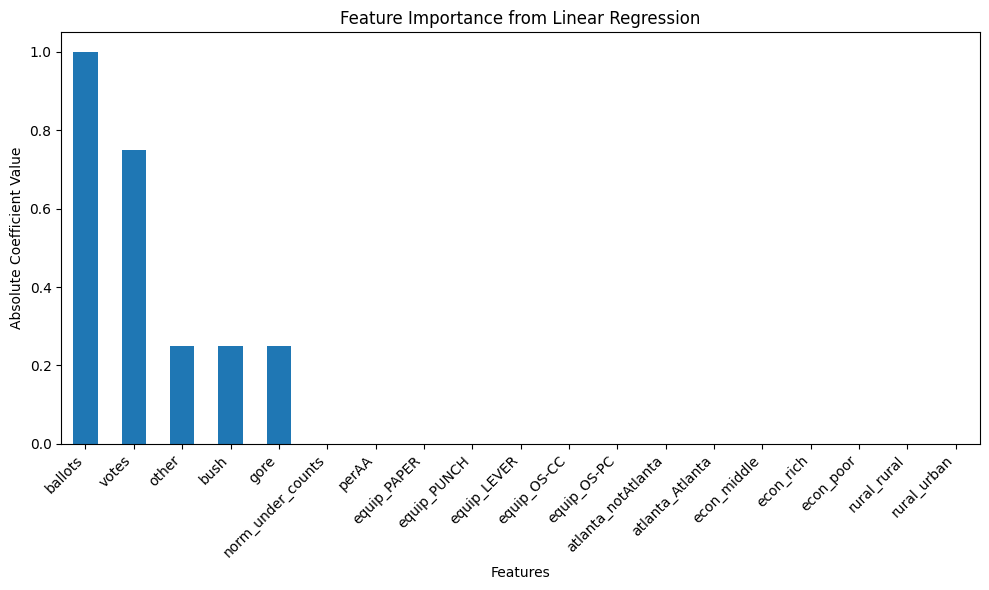

In [319]:
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()